In [1]:
# project: p10
# submitter: xxie65
# partner: none

In [2]:
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style> <style>.container {width:100% !important; }</style>')

In [3]:
import requests
import os 
import sqlite3
import matplotlib
import math
from matplotlib import pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline

In [4]:
def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    resp = requests.get(url)
    resp.raise_for_status()
    f = open(filename, "w")
    f.write(resp.text)
    f.close()

In [5]:
download("countries.json", "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/countries.json")
countries = pd.read_json('countries.json')
countries.head()

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA


In [6]:
#Q1: How many countries do we have in our dataset?
len(countries)

174

In [7]:
#Q2: what is the total population across all the countries in our dataset?
countries["population"].sum()

6261901793

In [8]:
download("capitals.json", "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/capitals.json")
capitals = pd.read_json('capitals.json')
capitals.head()

,country,capital,latitude,longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000
3,Anguilla,The Valley,18.216667,-63.050000
4,Argentina,Buenos Aires,-34.583333,-58.666667


In [9]:
#Q3: What are the capital names in capitals.json?
sorted(list(capitals["capital"]))

['Abu Dhabi',
 'Abuja',
 'Accra',
 'Addis Ababa',
 'Algiers',
 'Amman',
 'Amsterdam',
 'Ankara',
 'Antananarivo',
 'Apia',
 'Ashgabat',
 'Asmara',
 'Astana',
 'Asuncion',
 'Athens',
 'Baghdad',
 'Baku',
 'Bamako',
 'Bangkok',
 'Beijing',
 'Beirut',
 'Belmopan',
 'Berlin',
 'Bern',
 'Bishkek',
 'Bissau',
 'Bogota',
 'Brasilia',
 'Bridgetown',
 'Brussels',
 'Bucharest',
 'Budapest',
 'Buenos Aires',
 'Bujumbura',
 'Cairo',
 'Canberra',
 'Caracas',
 'Castries',
 'Chisinau',
 'Colombo',
 'Conakry',
 'Copenhagen',
 'Dakar',
 'Damascus',
 'Dar es Salaam',
 'Dhaka',
 'Djibouti',
 'Doha',
 'Dublin',
 'Dushanbe',
 'Freetown',
 'Gaborone',
 'George Town',
 'Georgetown',
 'Guatemala City',
 'Hagatna',
 'Hamilton',
 'Hanoi',
 'Harare',
 'Havana',
 'Helsinki',
 'Islamabad',
 'Jakarta',
 'Jamestown',
 'Jerusalem',
 'Kabul',
 'Kampala',
 'Kathmandu',
 'Khartoum',
 'Kigali',
 'Kingston',
 'Kingstown',
 'Kuala Lumpur',
 'Kuwait City',
 'Kyiv',
 'La Paz',
 'Libreville',
 'Lilongwe',
 'Lima',
 'Lisbon',


In [10]:
#Q4: What is the capital of Italy?
next(iter(capitals[capitals["country"] == "Italy"]["capital"]))

'Rome'

In [11]:
#Q5: Which country's capital is Brussels?
next(iter(capitals[capitals["capital"] == "Brussels"]["country"]))

'Belgium'

In [12]:
#Q6: Which 7 countries have the southern-most capitals?
list(capitals.sort_values(by = ["latitude"])[:7]["country"])

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [13]:
#Q7: Which 10 countries have the capitals closest to the North Pole?
list(capitals.sort_values(by = ["latitude"], ascending = False)[:10]["country"])

['Iceland',
 'Finland',
 'Norway',
 'Estonia',
 'Sweden',
 'Latvia',
 'Russia',
 'Denmark',
 'Lithuania',
 'Belarus']

In [14]:
#Q8: What is the distance between Camp Randall Stadium and the Wisconsin State Capital?

from haversine import haversine, Unit

randall = [43.070231, -89.411893]  
wisc_capital = [43.074645, -89.384113]   
haversine(randall, wisc_capital, unit = 'mi') 

1.4349003699749172

In [15]:
#Q9: What is the distance between Germany and Norway?
ger_co = [next(iter(capitals[capitals["country"] == "Germany"]["latitude"])), next(iter(capitals[capitals["country"] == "Germany"]["longitude"]))]
nor_co = [next(iter(capitals[capitals["country"] == "Norway"]["latitude"])), next(iter(capitals[capitals["country"] == "Norway"]["longitude"]))]
haversine(ger_co, nor_co, unit = 'mi')  

521.2217471002617

In [16]:
#Q10: What are the distances between Switzerland, Netherlands and Spain?
swi_co = [next(iter(capitals[capitals["country"] == "Switzerland"]["latitude"])), next(iter(capitals[capitals["country"] == "Switzerland"]["longitude"]))]
net_co = [next(iter(capitals[capitals["country"] == "Netherlands"]["latitude"])), next(iter(capitals[capitals["country"] == "Netherlands"]["longitude"]))]
spa_co = [next(iter(capitals[capitals["country"] == "Spain"]["latitude"])), next(iter(capitals[capitals["country"] == "Spain"]["longitude"]))]

dis_q10 = pd.DataFrame(index=["Switzerland", "Netherlands", "Spain"], 
                       columns=["Switzerland", "Netherlands", "Spain"])
dis_q10.iloc[0] = ["NaN", haversine(swi_co, net_co, unit = 'mi'), haversine(swi_co, spa_co, unit = 'mi')]
dis_q10.iloc[1] = [haversine(swi_co, net_co, unit = 'mi'), "NaN", haversine(net_co, spa_co, unit = 'mi')]
dis_q10.iloc[2] = [haversine(swi_co, spa_co, unit = 'mi'), haversine(spa_co, net_co, unit = 'mi'), "NaN"]

dis_q10

,Switzerland,Netherlands,Spain
Switzerland,NaN,392.302,715.303
Netherlands,392.302,NaN,920.326
Spain,715.303,920.326,NaN


In [17]:
#Q11: What is the distance between every pair of countries in the South American continent?
sa_countries = list(countries[countries["continent"] == "South America"]['country'])
sa_cos = []
for country in sa_countries:
    co = [next(iter(capitals[capitals["country"] == country]["latitude"])), 
          next(iter(capitals[capitals["country"] == country]["longitude"]))]
    sa_cos.append(co)
df_q11 = pd.DataFrame(index = sa_countries, columns = sa_countries)

for i in range(len(sa_countries)):
    country = sa_countries[i]
    co = sa_cos[i]
    for j in range(len(sa_countries)):
        country2 = sa_countries[j]
        co2 = sa_cos[j]
        if i == j:
            df_q11[str(country)][str(country2)] = "NaN"
        else:
            df_q11[str(country)][str(country2)] = haversine(co, co2, unit = 'mi')
df_q11

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Chile,NaN,2899.58,2638.49,2897.83,1871.04,1181.57,3045.78,691.266,1532.55,2351.85,833.985,964.308
Guyana,2899.58,NaN,1105.84,215.487,1710.26,1748.99,647.421,2859.52,1839.14,1484.23,2880.65,2215.83
Colombia,2638.49,1105.84,NaN,1304.31,2277.1,1513.17,639.807,2887.37,1168.32,451.319,2964.3,2339.25
Suriname,2897.83,215.487,1304.31,NaN,1573.77,1780.01,862.058,2801.84,1946.11,1662.86,2811.71,2155.36
Brazil,1871.04,1710.26,2277.1,1573.77,NaN,1343.23,2230.25,1460.16,1969.14,2346.22,1413.08,908.82
Bolivia,1181.57,1748.99,1513.17,1780.01,1343.23,NaN,1866.43,1380.42,670.394,1327.68,1468.28,907.432
Venezuela,3045.78,647.421,639.807,862.058,2230.25,1866.43,NaN,3159.83,1706.61,1088.82,3209.59,2546.58
Argentina,691.266,2859.52,2887.37,2801.84,1460.16,1380.42,3159.83,NaN,1937.82,2698.03,143.17,646.487
Peru,1532.55,1839.14,1168.32,1946.11,1969.14,670.394,1706.61,1937.82,NaN,823.629,2048,1559.72
Ecuador,2351.85,1484.23,451.319,1662.86,2346.22,1327.68,1088.82,2698.03,823.629,NaN,2793.15,2220.2


In [18]:
#Q12: What is the most central country in the South American continent?
df_q11 = df_q11.astype(float)
df_q11.mean().sort_values().index[0]

'Bolivia'

In [19]:
#Q13: What is the least central country in South America?
df_q11.mean().sort_values(ascending = False).index[0]

'Uruguay'

In [20]:
#Q14: How close is each country in South America to it's nearest neighbor?
df_q14 = pd.DataFrame(df_q11.idxmin(), columns = ["nearest"])
df_q14["distance"] = df_q11.min().values
df_q14

,nearest,distance
Chile,Argentina,691.266343
Guyana,Suriname,215.486643
Colombia,Ecuador,451.318925
Suriname,Guyana,215.486643
Brazil,Paraguay,908.819633
Bolivia,Peru,670.393988
Venezuela,Colombia,639.807399
Argentina,Uruguay,143.169807
Peru,Bolivia,670.393988
Ecuador,Colombia,451.318925


In [21]:
#Q15: How far is each country in South America to it's furthest neighbor?
df_q15 = pd.DataFrame(df_q11.idxmax(), columns = ["furthest"])
df_q15["distance"] = df_q11.max().values
df_q15

,furthest,distance
Chile,Venezuela,3045.782196
Guyana,Chile,2899.575619
Colombia,Uruguay,2964.298613
Suriname,Chile,2897.832084
Brazil,Ecuador,2346.221468
Bolivia,Venezuela,1866.433063
Venezuela,Uruguay,3209.590944
Argentina,Venezuela,3159.828108
Peru,Uruguay,2048.000119
Ecuador,Uruguay,2793.145008


In [22]:
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

In [23]:
#Q16: In our dataset, how many countries are in each continent?
def qry(sql):
    return pd.read_sql(sql, conn)

qry ("""
SELECT continent, count(*) as `number of countries`
FROM countries
group by continent
order by `number of countries` 
""")

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


Text(0, 0.5, 'number of countries')

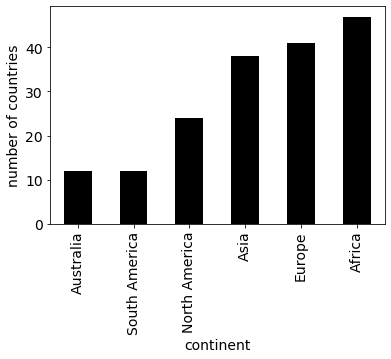

In [24]:
#Q17: How many countries are in each continent? (answer with a plot)
df_q17 = qry ("""
SELECT continent, count(*) as `number of countries`
FROM countries
group by continent
order by `number of countries` 
""")

matplotlib.rcParams["font.size"] = 14
ax_q17 = df_q17.plot.bar(x = "continent", y = "number of countries", color = "black", legend = False)
ax_q17.set_ylabel("number of countries")

In [25]:
#Q18: What is the total area of each continent?
df_q18 = qry ("""
SELECT continent, sum(area) as `total area`
FROM countries
group by continent
order by `total area` desc
""")
df_q18

,continent,total area
0,Asia,29731231
1,Africa,25199550
2,Europe,23708430
3,North America,22327685
4,South America,17715335
5,Australia,8488612


Text(0, 0.5, 'total area')

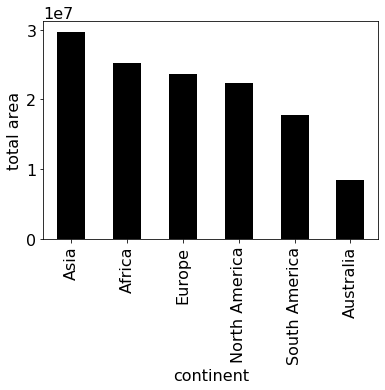

In [26]:
#Q19: What is the total area of each continent? (answer with a plot)
df_q18["total area"] = df_q18["total area"].astype(float)
matplotlib.rcParams["font.size"] = 16
ax_q19 = df_q18.plot.bar(x = "continent", y = "total area", color = "black", legend = False)
ax_q19.set_ylabel("total area")

In [27]:
#Q20: What is the area of each country in South America?
df_q20 = qry ("""
SELECT country, area
FROM countries
where continent = 'South America'
order by area desc
""")
df_q20

,country,area
0,Brazil,8511965
1,Argentina,2766890
2,Peru,1285220
3,Colombia,1138910
4,Bolivia,1098580
5,Venezuela,912050
6,Chile,756950
7,Paraguay,406750
8,Ecuador,283560
9,Guyana,214970


In [28]:
#Q21: What are the top 8 countries that have the largest real GDP?
df_q21 = qry('''
select country, `gdp-per-capita`*population/1000000000.0 as `real GDP (billion)`
from countries
order by `real GDP (billion)` desc
limit 8
''')
df_q21

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690


Text(0, 0.5, 'real GDP (billion)')

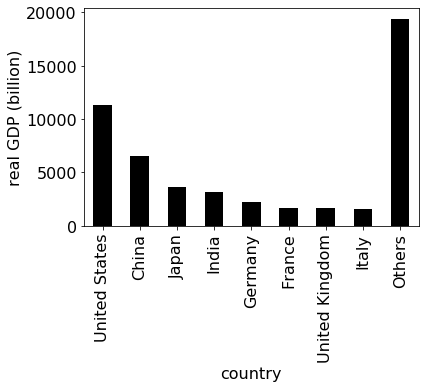

In [29]:
#Q22: What are the top 8 countries that have the largest real GDP? (answer with a plot)
df_others = pd.DataFrame([["Others", "NaN"]], columns=['country', 'real GDP (billion)'])
plot_df_q22 = df_q21.append(df_others, ignore_index=True)

df_gdp = qry('''
select country, `gdp-per-capita`*population/1000000000.0 as `real GDP (billion)`
from countries
order by `real GDP (billion)` desc
''')
df_gdp[8:]["real GDP (billion)"].sum()
plot_df_q22["real GDP (billion)"][8] = df_gdp[8:]["real GDP (billion)"].sum()
plot_df_q22

ax_q22 = plot_df_q22.plot.bar(x = "country", y = "real GDP (billion)", color = "black", legend = False)
ax_q22.set_ylabel("real GDP (billion)")

Text(0, 0.5, 'net-migration')

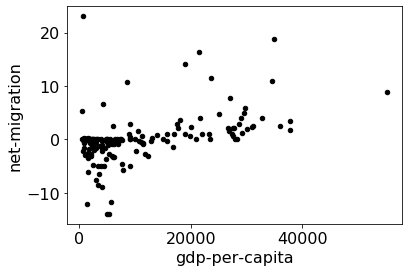

In [30]:
#Q23: What is the relationship between GDP per capita and net-migration?
df_q23 = qry('''
select `gdp-per-capita`, `net-migration`
from countries
''')
ax_q23 = df_q23.plot.scatter(x = "gdp-per-capita", y = "net-migration", color = "black", legend = False)
ax_q23.set_ylabel("net-migration")

In [31]:
#Q24: What is the correlation between GDP per capita and net-migration?
countries.corr()["gdp-per-capita"]["net-migration"]

0.4523211325011283

Text(0, 0.5, 'death-rate')

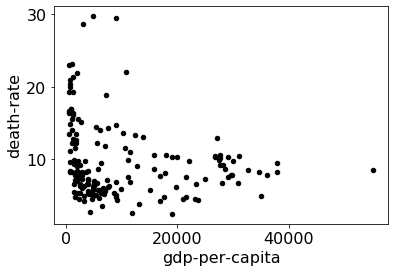

In [32]:
#Q25: What is the relationship between GDP per capita and death rates?
df_q25 = qry('''
select `gdp-per-capita`, `death-rate`
from countries
''')
ax_q25 = df_q25.plot.scatter(x = "gdp-per-capita", y = "death-rate", color = "black", legend = False)
ax_q25.set_ylabel("death-rate")

Text(0, 0.5, 'infant-mortality')

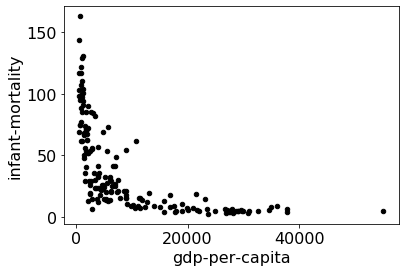

In [33]:
#Q26: What is the relationship between GDP per capita and infant-mortality?
df_q26 = qry('''
select `gdp-per-capita`, `infant-mortality`
from countries
''')
ax_q26 = df_q26.plot.scatter(x = "gdp-per-capita", y = "infant-mortality", color = "black", legend = False)
ax_q26.set_ylabel("infant-mortality")

Text(0, 0.5, 'inverse')

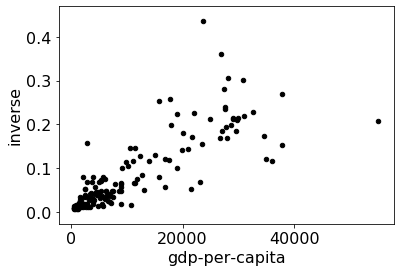

In [34]:
#Q27: What is the relationship between GDP per capita and inverse of infant-mortality?
df_q27 = qry('''
select `gdp-per-capita`, 1/`infant-mortality` as inverse
from countries
''')
ax_q27 = df_q27.plot.scatter(x = "gdp-per-capita", y = "inverse", color = "black", legend = False)
ax_q27.set_ylabel("inverse")

In [35]:
#Q28: fit a y = m * x + n line to the scatter plot in question 27 using the least-squares method;
#what are the coefficients m and n?
import numpy as np

df_q27["1"] = 1

res = np.linalg.lstsq(df_q27[["gdp-per-capita", "1"]], df_q27["inverse"], rcond=None)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
m,n

(6.482983154848297e-06, 0.013237849092120857)

In [36]:
#Q29: When gdp-per-capita = 50000, what is the expected value for infant-mortality?
1/(50000*m + n)

2.963955279079342

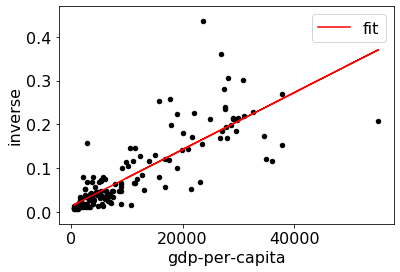

In [37]:
#Q30: plot the regression line to the scatter plot
ax = df_q27.plot.scatter(x='gdp-per-capita', y='inverse', color = "black")
df_q27["fit"] = df_q27["gdp-per-capita"] * m + n
df_q27.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [38]:
conn.close()